# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## Identitas
1. Nama: Rayhan Egar Sadtya Nugraha
2. NIM: 225150201111014
3. Kelas: PPM-D

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

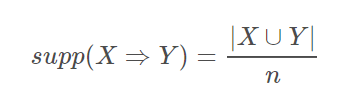

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

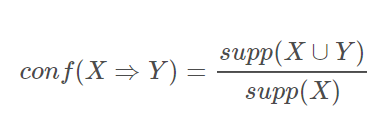

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
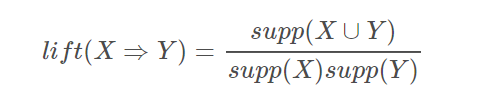



---



# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data BreadBasket_DMS.csv yang bisa temen-temen download [disini](https://github.com/viktree/curly-octo-chainsaw/blob/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv)

Sekarang import data ke DataFrame dengan library pandas.

In [3]:
df = pd.read_csv('BreadBasket_DMS.csv')
df.shape

(21293, 4)

Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 21293 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong

In [4]:
# cek tipe data dari setiap kolom
df.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [5]:
# mencetak 10 data pertama
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [12]:
#Mencetak jumlah data item yang unik (memiliki nilai item berbeda)
df['Item'].value_counts()

Item
Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Polenta            1
The BART           1
Chicken sand       1
Gift voucher       1
Raw bars           1
Name: count, Length: 95, dtype: int64

In [13]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [14]:
# Cek missing value dan zeros
df.isna().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [20]:
# cek nilai "NONE" pada kolom Item
df[df['Item']=="NONE"].shape[0]

786

Terdapat nilai 'NONE' di dataset kita. Ini bisa berarti bahwa ada item yang tidak dibeli, atau nama item tersebut tidak dicatat. Terdapat 786 data dengan nilai "None" dari total 21293. Karena data ini tidak berguna, maka bisa kita hapus saja.

In [24]:
# menghapus baris dengan nilai Item = None
index_none = df[df['Item']=='NONE'].index
df.drop(index=index_none, inplace=True)

In [25]:
# cek perubahan yang terjadi
df.shape[0]

20507

In [29]:
df['Item'].unique().shape[0]

94

Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [34]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0]).astype('int64')
# Month
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1]).astype('int64')
# Day
df['Day'] = df['Date'].apply(lambda x: x.split('-')[2]).astype('int64')

In [35]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  int64 
 5   Month        20507 non-null  int64 
 6   Day          20507 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year  Month  Day
0  2016-10-30  09:58:11            1          Bread  2016     10   30
1  2016-10-30  10:05:34            2   Scandinavian  2016     10   30
2  2016-10-30  10:05:34            2   Scandinavian  2016     10   30
3  2016-10-30  10:07:57            3  Hot chocolate  2016     10   30
4  2016-10-30  10:07:57            3            Jam  2016     10   30


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 30/10/2016 hingga 09/04/2017. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [37]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts(ascending=False)[:20]

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Item
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: count, dtype: int64


In [38]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


In [47]:
item_20_index = df['Item'].value_counts(ascending=False)[:20].index
item_20_values = df['Item'].value_counts(ascending=False)[:20].values

In [48]:
print(item_20_index)
print(item_20_values)

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna',
       'Hot chocolate', 'Cookies', 'Brownie', 'Farm House', 'Muffin', 'Juice',
       'Alfajores', 'Soup', 'Scone', 'Toast', 'Scandinavian', 'Truffles',
       'Coke'],
      dtype='object', name='Item')
[5471 3325 1435 1025  856  771  616  590  540  379  374  370  369  369
  342  327  318  277  193  185]


/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Bread'),
  Text(2, 0, 'Tea'),
  Text(3, 0, 'Cake'),
  Text(4, 0, 'Pastry'),
  Text(5, 0, 'Sandwich'),
  Text(6, 0, 'Medialuna'),
  Text(7, 0, 'Hot chocolate'),
  Text(8, 0, 'Cookies'),
  Text(9, 0, 'Brownie'),
  Text(10, 0, 'Farm House'),
  Text(11, 0, 'Muffin'),
  Text(12, 0, 'Juice'),
  Text(13, 0, 'Alfajores'),
  Text(14, 0, 'Soup'),
  Text(15, 0, 'Scone'),
  Text(16, 0, 'Toast'),
  Text(17, 0, 'Scandinavian'),
  Text(18, 0, 'Truffles'),
  Text(19, 0, 'Coke')])

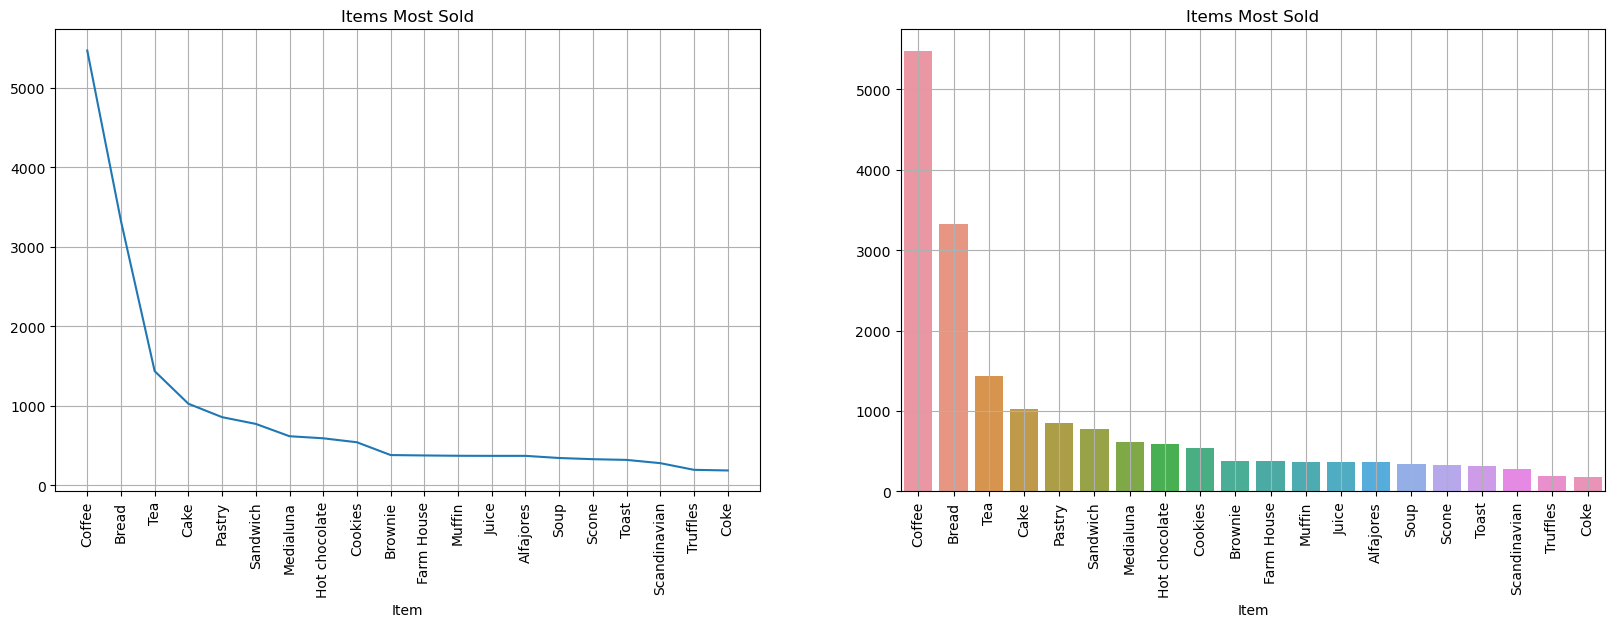

In [51]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.lineplot(x=item_20_index, y=item_20_values).grid(True)
plt.title('Items Most Sold')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=item_20_index, y=item_20_values).grid(True)
plt.title('Items Most Sold')
plt.xticks(rotation=90)

Berdasarkan hasil visualisasi, sebutkan 3 barang yang paling banyak terjual!

<b>Jawaban:</b><br>
Berdasarkan hasil visualisasi menggunakan _lineplot_ dan _barplot_ di atas, diketahui jika tiga barang teratas yang paling sering dibeli adalah 'Coffee', 'Bread' dan 'Tea'


/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


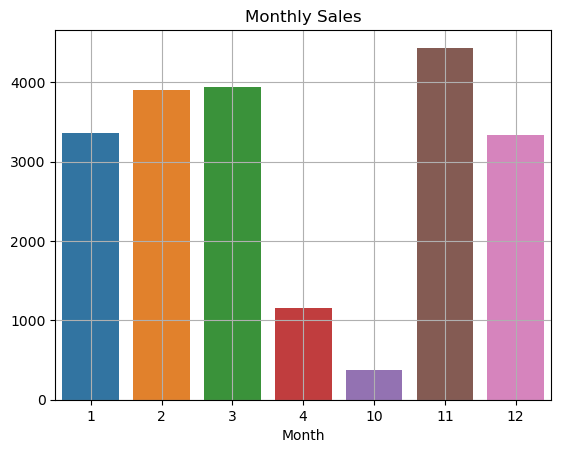

In [75]:
#buat visualisasi data diagram batang dengan judul 'Monthly Sales' dengan sumbu x bulan dan sumbu y jumlah transaksi
plt.title('Monthly Sales')
sns.barplot(x=df['Month'].value_counts().index, y=df['Month'].value_counts().values).grid(True)
plt.show()

In [63]:
print(df['Month'].unique())
print(df.groupby('Month').size())

[10 11 12  1  2  3  4]
Month
1     3356
2     3906
3     3944
4     1157
10     369
11    4436
12    3339
dtype: int64


Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan yang drastis pada bulan 4 dan 10. Ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [69]:
print(df.groupby('Month')['Day'].nunique())

Month
1     30
2     28
3     31
4      9
10     2
11    30
12    29
Name: Day, dtype: int64


Pada Bulan 4 hanya tercatat 9 hari dan pada bulan  10 hanya tercatat 2 hari

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [70]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar

In [71]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [72]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [73]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(df=frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
39,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
40,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
9,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
8,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
31,(Toast),(Coffee),0.023666,0.704403,1.472431
30,(Coffee),(Toast),0.023666,0.049470,1.472431
36,"(Coffee, Bread)",(Pastry),0.011199,0.124413,1.444872
37,(Pastry),"(Coffee, Bread)",0.011199,0.130061,1.444872


In [74]:
metrix.shape[0]

42

# **Kesimpulan**

## Penjelasan Metrics
Pada algoritma Apriori, hasil akhir yang diharapkan adalah sebuah ruleset berupa hubungan asosiasi dengan bentuk umum  
$ \{\text{'antecedents'}\} -> \{\text{'consequents'}\} $ berdasarkan dari frequent item set yang ditemukan dengan ambang batas support tertentu. 

- 'Antecedents' merupakan pre-kondisi yang perlu dipenuhi. Dalam konteks data penjualan Bread Basket seperti UAP ini, maka 'Antecedents' dapat diinterpretasikan sebagai menu yang dibeli oleh kustomer.
- 'Consequents' merupakan pos-kondisi yang akan terjadi/terpenuhi jika 'antecedents' sudah dipenuhi. Dalam konteks data penjualan Bread Basket, 'consequents' dapat diinterpretasikan sebagai menu yang akan diambil (kemungkinan besar akan dibeli) oleh kustomer jika kustomer tersebut sudah mengambil 'antecedents' tertentu.
- 'Support' merupakan representasi informasi seberapa sering subset menu Bakery tersebut diambil/terjadi dari total transaksi/record yang ada. Secara sederhana, $ \text{support}_{\text{'coffee'}} $ dapat diinterpretasikan sebagai banyaknya pembelian/transaksi menu 'coffee' dari semua transaksi yang ada. Akan tetapi jika digunakan dalam association rule, maka perhitungan support adalah sebagai berikut:

$$

\text{Support}_{X -> Y} = \frac{\text{Support}_{X \cup Y}}{n}

$$

- 'Confidence' merupakan nilai yang merepresentasikan persentase/probabilitas terjadinya 'consequents' setelah seluruh 'antecedents' telah terpenuhi. Dalam contoh salah satu association rule di atas, 'confidence' dari rule {'Tea', 'Coffee'} -> {'Cake'} menyatakan kemungkinan seorang kustomer yang membeli 'tea' dan 'coffee' untuk membeli sebuah 'cake'.

$$

\text{Conf}_{X -> Y} = \frac{\text{Support}_{X \cup Y}}{\text{Support}_{X}}

$$

- 'Lift' merupakan nilai yang merepresentasikan probabilitas pembelian menu 'antecedents' dan menu 'consequents' secara kolektif jika dibandingkan dengan pembelian kedua jenis menu tersebut secara terpisah. Dalam konteks ini, contohnya pada rule no. 11 untuk {'Tea'} -> {'Cake'}, nilai 'lift' sebesar 1.605 mengindikasikan jika pembelian kedua item tersebut secara bersamaan lebih sering terjadi dari pembelian kedua item tersebut secara terpisah.

## Interpretasi Result Apriori
Dari tabel *ruleset* di atas, ditemukan 42 association rule yang berhasil di-generate dari *frequent item set* yang ditemukan pada data penjualan Bakery selama setahun. Ke-42 association rule tersebut memenuhi persyaratan/threshold yang diberikan, seperti minimum support sebesar 0.01 (setidaknya memiliki support sebanyak 10% dari total penjualan) dan minimum lift sebesar 1.0 (menandakan jika kedua item tersebut lebih sering dibeli secara bersamaan daripada secara terpisah). Masing-masing rule memiliki metode interpretasi yang sama dengan metode interpretasi di atas, sehingga di sini Saya akan mengambil satu contoh association rule, yaitu rule nomor 30.

Pada rule nomor 30, diketahui jika association rule Coffee -> Toast memenuhi minimum support (dihitung dengan support antecedents) dengan setidaknya 0.024 dan dengan confidence 0.49. Hal ini menandakan jika dari total transaksi yang ada, pembelian 'Coffee' dan 'Toast' di sini setidaknya terjadi pada 2 persen total transaksi. Confidence '0.49' sendiri menandakan jika 49% dari pembelian 'Coffee' akan berujung pada pembelian 'Toast'. Meskipun angka tersebut tidak mencapai 50%, akan tetapi rule ini memiliki nilai 'lift' yang cukup tinggi (1.473).